# ENGR-E 221 Homework 7: Dimensional Reduction

## Due: Monday 10/16/2023 at 23:59 EST

## Homework Details 

**Your name must be included wihin the filename you submit and in the notebook**

Make sure all the source code is in your root HW7 directory, and not in some weird sub-directory. Make sure you can run the code (from within Jupyter or from within an interactive Python shell). ALL your code must by included either as .py files that are submitted as a zip or as a complete notebook. 

## 1. Classification Performance with IRIS (10 points)

Load the IRIS data into your progrmaming environment. 

Write a function named classification_check that takes a data set and labels as arguments. 

Procedure:

1. Choose a classifier C of your choice
2. Divide data in training and test sets.
3. Fit you data using C and make predictions on test data.
4. Create a scatter plot with test data using actual labels for color
5. Create a scatter plot with test data according to class labels assigned by your classifier 
6. Print Confusion Matrix for this fit.

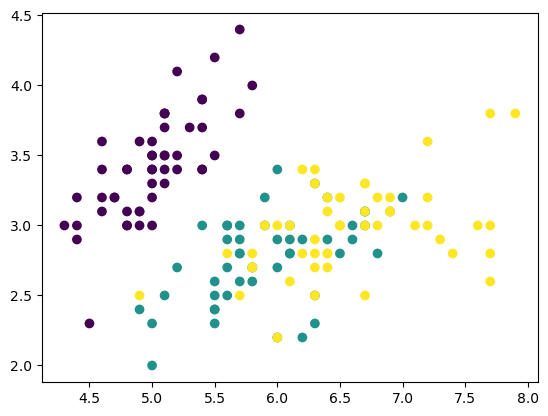

Score for the SVM model: 0.949109907120743


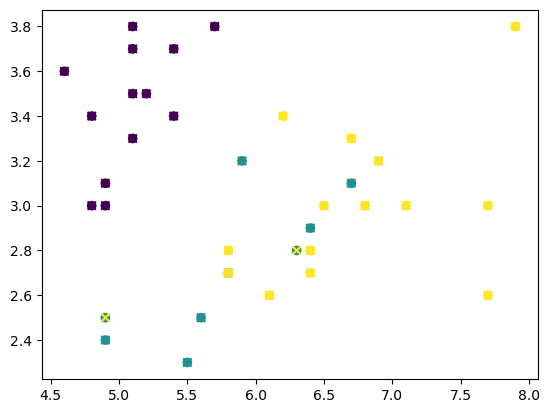

[[13  0  0]
 [ 0  7  0]
 [ 0  2 16]]


In [1]:
# 1  
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()

# from homework 5

X = iris.data[:, :4] # 4 features
y = iris.target # labels

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

def classification_check(a, b): 
    x_train , x_test ,y_train , y_test = train_test_split(a, b)
    model = SVC()
    model.fit(x_train, y_train)
    pred_y = model.predict(x_test)
    f1_xy = f1_score(y_test,pred_y, average="weighted")
    print(f"Score for the SVM model: {f1_xy}")
        
    plt.scatter(x_test[:,0], x_test[:,1], c = pred_y)
    plt.scatter(x_test[:,0], x_test[:,1], marker= 'x', c = y_test)
    plt.show()
    
    con_matrix = confusion_matrix(y_test, pred_y)
    print(con_matrix)


classification_check(X, y)

## Question 2: Reduce number of features using PCA (20 points) 

1. Import PCA from sklearn and use it to fit your data to 3,2 and 1 dimensions. Print the variance ratio for each fit and choose the best options. (5 pts)
2. Discuss your choice of how many dimensions you should keep. (3 pts) 
3. Transform your data to lower dimension. (2 pts) 
4. Send this data to function you wrote in question 2. (5 pts)
5. Identify and discuss difference from original data. (5 pts) 

[0.92461872 0.05306648 0.01710261]
[0.92461872 0.05306648]
[0.92461872]
Score for the SVM model: 0.9737568058076227


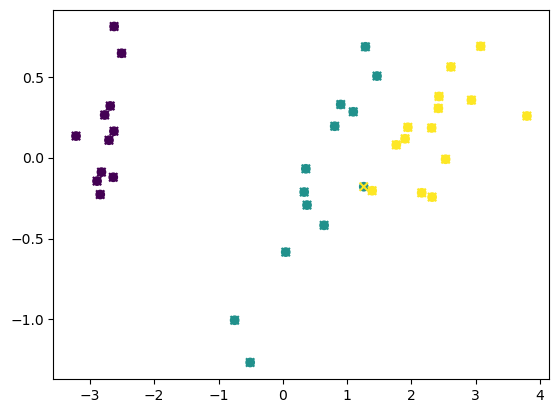

[[11  0  0]
 [ 0 12  0]
 [ 0  1 14]]


In [2]:
# 2 
from sklearn.decomposition import PCA

pca3 = PCA(n_components=3, whiten = False, random_state = 0)
pca3_result = pca3.fit_transform(X)
print (pca3.explained_variance_ratio_)

pca2 = PCA(n_components=2, whiten = False, random_state = 0)
pca2_result = pca2.fit_transform(X)
print (pca2.explained_variance_ratio_)

pca1 = PCA(n_components=1, whiten = False, random_state = 0)
pca1_result = pca1.fit_transform(X)
print (pca1.explained_variance_ratio_)

X_pca= pca2_result

classification_check(X_pca, y)

### Question 2 part 2 and part 5

2. I choose only two dimension given that the precentage of the all three dementions represent the closest value to 100% of the data but the thrird component only represented the 2% of all data an amount that is almost insgneficant to include in this part of the task.(Improve this an explain better)

5.

## Question 3: Reduce the number of features using TSNE (20 points) 

1. Import TSNE from sklearn and use it to fit your data to 3,2 and 1 dimensions. Print kl_divergence for each fit and choose the best option. (5 pts)
2. Discuss your choice of how many dimensions you should keep. (3 pts) 
3. Transform your data to lower dimension. (2 pts) 
4. Send this data to function you wrote in question 2. (5 pts) 
5. Identify and discuss differences from your PCA results. (5 pts) 

The score for 3 components with Kullback-Leibler divergence test: 1.3734864882979019
The score for 2 components with Kullback-Leibler divergence test: 0.12289852737343074
The score for 1 components with Kullback-Leibler divergence test: 0.4839461236478866
Score for the SVM model: 0.9738861219545027


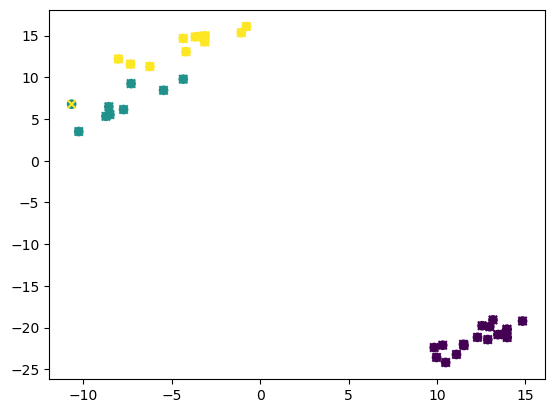

[[18  0  0]
 [ 0  8  0]
 [ 0  1 11]]


In [3]:
# 3
from sklearn.manifold import TSNE

tsne3 = TSNE(n_components=3,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=0)
tsne3_result = tsne3.fit_transform(X)
print(f"The score for 3 components with Kullback-Leibler divergence test: {tsne3.kl_divergence_}")

tsne2 = TSNE(n_components=2,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=0)
tsne2_result = tsne2.fit_transform(X)
print(f"The score for 2 components with Kullback-Leibler divergence test: {tsne2.kl_divergence_}")

tsne1 = TSNE(n_components=1,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=0)
tsne1_result = tsne1.fit_transform(X)
print(f"The score for 1 components with Kullback-Leibler divergence test: {tsne1.kl_divergence_}")

X_tsne=tsne2_result

classification_check(X_tsne, y)

### Question 3 part 2 and part 5

part 2. In the same case as PCA writte a des

part 5. Compare 